# Evenhandedness in Fund Programs

## Clustering using Dirichlet Gaussian Mixture Models and K-Means

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

xls=pd.ExcelFile('Cluster Fund Programs.xlsx')
df=pd.read_excel(xls,'GMM')

In [59]:
df.head(5)

,country_name,country_code,country_iso_3_code,code,region,arrangement_type,year,bca_gdp_bp6,bfd_gdp_bp6,d_gdp,...,exceptional_access,precautionary,prg_length,eff,sba,pll,ecf,esf,scf,blend
0,Greece,174,GRC,1742010,EUR,SBA,2010,-11.384279,0.410121,184.71552,...,1,0,2,0,1,0,0,0,0,0
1,Greece,174,GRC,1742012,EUR,EFF,2012,-3.831144,-0.432627,241.83867,...,1,0,4,1,1,0,0,0,0,0
2,Iceland,176,ISL,1762008,EUR,SBA,2008,-22.599819,-29.030277,179.86908,...,1,0,3,0,1,0,0,0,0,0
3,Ireland,178,IRL,1782010,EUR,EFF,2010,-1.197674,-9.715908,1039.38540,...,1,0,3,1,0,0,0,0,0,0
4,Portugal,182,PRT,1822011,EUR,EFF,2011,-6.001705,2.453360,207.26927,...,1,0,3,1,0,0,0,0,0,0


In [60]:
#matrix size
df.shape

(177, 37)

** Evenhandedness: Countries in similar circumstances should be treated similarly.**

There are two parts to this df. First part is country attributes, columns 8-24; and IMF-imposed variables, columns 25-37. 

In [64]:
df1= df.iloc[:, 7:24]
df2= df.iloc[:,24:37]

## Metadata

              
    ---------------------------------------------------------------------------------------------------------------
                  storage   display    value
    variable name   type    format     label      variable label
    --------------------------------------------------------------------------------------------------------------
    country_name    str130  %130s                 Country.Name
    country_code    int     %10.0g                Country.Code
    country_iso_3~e str3    %9s                   Country.ISO-3 code
    year            float   %9.0g                 year
    arrangement_t~e str16   %16s                  Arrangement Type
    bca_gdp_bp6     float   %8.0g                 Balance on goods and services, percent of GDP in U.S. dollars
    bfd_gdp_bp6     float   %8.0g                 Direct investment, (BPM6), percent of GDP in U.S. dollars
    d_gdp           float   %8.0g                 Total external debt, gross, percent of GDP in U.S. dollars
    ggxcnl_gdp      float   %8.0g                 General govt net lending/borrowing, national currency, percent
                                                    of fiscal year GDP
    iar_gdp_bp6     float   %8.0g                 Reserve Assets (Inc. reserve position in the Fund and SDR 
                                                    holdings), percent of GDP in U.S. dollars
    ngdpd           float   %8.0g                 Gross domestic product, current prices in U.S. dollars
    ngdpdpc         float   %8.0g                 Gross domestic product per capita, current prices in U.S. dollars
    ngdp_rpch       float   %8.0g                 GDP, constant prices in national currency, percent change
    pcpie_pch       float   %8.0g                 Consumer Prices, end-of-period, percent change
    DCP             float   %9.0g                 Domestic Credit to the Private Sector (% of GDP)
    region          str6    %9s                   Region
    small_state     byte    %10.0g                Small State
    fuel_exporter   byte    %10.0g                Fuel Exporter
    exchange_rate   float   %9.0g                
    trade_openness  float   %9.0g                
    fragile         byte    %10.0g               
    ICRG_polrisk                                  ICRG Political risk score 
    
    ---------------------------------------------------------------------------------------------------------------
                  storage   display    value
    variable name   type    format     label      variable label
    --------------------------------------------------------------------------------------------------------------
    PRGT            int     %10.0g                Dummy
    credit_outs     long    %10.0g                Credit Outstanding
    quota           double  %10.0g                Quota
    exceptional_a~s byte    %10.0g                Exceptional Access
    precautionary   byte    %10.0g                Precautionary (Using MONA)
    prg_length      float   %9.0g                 Program Length
    eff             float   %9.0g                
    sba             float   %9.0g                
    pll             float   %9.0g                
    ecf             float   %9.0g                
    esf             float   %9.0g                
    scf             float   %9.0g                
    blend           float   %9.0g    

    --------------------------------------------------------------------------------------------------------------

### First, let's use columns 8-24 to cluster "Countries in similar circumstances"

## To do list:
1) Compare K-Means results with GMM.

#### Regularization

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_reg = scaler.fit_transform(df1)

xregdf=pd.DataFrame(x_reg)
xregdf.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.475464,0.974506,1.239401,-1.567582,-1.403574,3.273165,3.348084,-1.918951,-0.270581,-0.346775,-0.30429,1.496367,-0.840192,-0.460791,-0.840192,2.352574,1.166106
1,0.354267,0.822600,1.841674,-0.685492,-1.322931,2.579774,2.643713,-2.329907,-0.772192,-0.346775,-0.30429,1.496367,-0.591533,-0.460791,-0.591533,2.512088,0.943211
2,-1.707519,-4.332155,1.188302,-1.917889,0.299452,-0.343698,7.502872,-0.309169,1.074047,-0.346775,-0.30429,1.140377,0.059806,-0.460791,0.059806,4.980487,1.866633
3,0.643561,-0.850720,10.250546,-5.554165,-1.516457,2.278966,6.531677,-0.286216,-0.826575,-0.346775,-0.30429,1.496367,2.945741,-0.460791,2.945741,3.011878,1.707422
4,0.115826,1.342802,1.477194,-0.838561,-0.698673,2.570968,2.797095,-1.095366,-0.442584,-0.346775,-0.30429,1.496367,-0.244885,-0.460791,-0.244885,3.715858,1.484527


In [84]:
from sklearn.mixture import BayesianGaussianMixture

In [87]:
max_num_components = 75
bnp = BayesianGaussianMixture(weight_concentration_prior_type="dirichlet_process", n_components=max_num_components,
                              reg_covar=0, init_params='random', max_iter=1500, mean_precision_prior=.8,
                              random_state=2702)
bnp.fit(X_scaled)

ValueError: Fitting the mixture model failed because some components have ill-defined empirical covariance (for instance caused by singleton or collapsed samples). Try to decrease the number of components, or increase reg_covar.

In [78]:
from collections import Counter
import random
from sklearn import cluster, metrics
%matplotlib inline

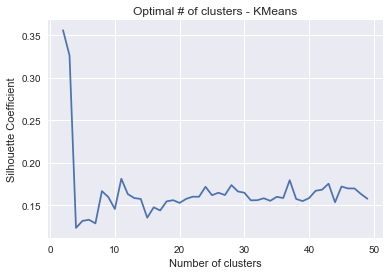

In [83]:
# calculate SC for K=2 through K=50
k_range = range(2, 50)
scores = []
for k in k_range:
    km = cluster.KMeans(n_clusters=k, random_state=12)
    km.fit(x_reg)
    scores.append(metrics.silhouette_score(x_reg, km.labels_))

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Optimal # of clusters - KMeans')
plt.grid(True)

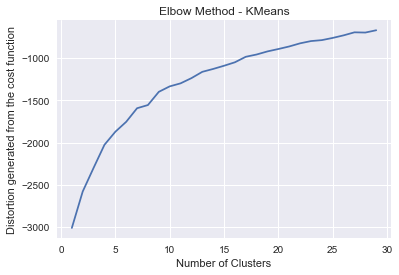

In [82]:
from sklearn.cluster import KMeans
import pylab as pl
Nc = range(1, 30)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(x_reg).score(x_reg) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Distortion generated from the cost function')
pl.title('Elbow Method - KMeans')
pl.show()

## Component reduction via PCA

In [88]:
from sklearn.decomposition import PCA
from scipy import stats

pca = PCA(n_components=16)
Y_sklearn = pca.fit_transform(X_scaled)

In [89]:
max_num_components = 75
bnp = BayesianGaussianMixture(weight_concentration_prior_type="dirichlet_process", n_components=max_num_components,
                              reg_covar=0, init_params='random', max_iter=1500, mean_precision_prior=.8,
                              random_state=2702)
bnp.fit(Y_sklearn)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
            degrees_of_freedom_prior=None, init_params='random',
            max_iter=1500, mean_precision_prior=0.8, mean_prior=None,
            n_components=75, n_init=1, random_state=2702, reg_covar=0,
            tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
            weight_concentration_prior=None,
            weight_concentration_prior_type='dirichlet_process')

In [90]:
cluster_ids=bnp.predict(Y_sklearn)
df['cluster']=cluster_ids

In [91]:
df.head()

,country_name,country_code,country_iso_3_code,code,region,arrangement_type,year,bca_gdp_bp6,bfd_gdp_bp6,d_gdp,...,precautionary,prg_length,eff,sba,pll,ecf,esf,scf,blend,cluster
0,Greece,174,GRC,1742010,EUR,SBA,2010,-11.384279,0.410121,184.71552,...,0,2,0,1,0,0,0,0,0,54
1,Greece,174,GRC,1742012,EUR,EFF,2012,-3.831144,-0.432627,241.83867,...,0,4,1,1,0,0,0,0,0,54
2,Iceland,176,ISL,1762008,EUR,SBA,2008,-22.599819,-29.030277,179.86908,...,0,3,0,1,0,0,0,0,0,59
3,Ireland,178,IRL,1782010,EUR,EFF,2010,-1.197674,-9.715908,1039.38540,...,0,3,1,0,0,0,0,0,0,70
4,Portugal,182,PRT,1822011,EUR,EFF,2011,-6.001705,2.453360,207.26927,...,0,3,1,0,0,0,0,0,0,54


In [93]:
writer = pd.ExcelWriter('Test.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='GMM')
writer.save()